In [34]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 12, 8
plt.rc('xtick', labelsize='x-large')
plt.rc('font', size=15, weight='normal')
plt.rc('ytick', labelsize='x-large')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelweight"] = 'normal'
plt.rcParams["lines.markersize"] = 10
plt.rc('xtick.major',size=4,width=3)
plt.rc('ytick.major',size=4,width=3)
plt.rc('xtick.minor',visible=True,size=3,width=1)
plt.rc('ytick.minor',visible=True,size=3,width=1)



plt.rcParams['savefig.dpi'] = 300

In [35]:
import pandas as pd

import obspy
from obspy import read, read_inventory
from obspy.signal import PPSD
import numpy as np

In [36]:
from obspy.core import read, UTCDateTime
from obspy.clients.arclink import Client
from obspy import UTCDateTime, Stream, read
from obspy.geodetics.base import gps2dist_azimuth
from obspy.core.util import AttribDict
import matplotlib
import matplotlib as mpl
new_style = {'grid': False}
mpl.rc('axes', **new_style)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from obspy import read_events
from obspy import read
import obspy
from obspy.signal.trigger import classic_sta_lta
from obspy.core import read
from obspy import read, read_inventory
from obspy.signal.trigger import recursive_sta_lta, trigger_onset


In [37]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [6]:
ppsd_HHZ = PPSD.load_npz('NPZ/ELIS/ELIS.HHZ.2017.ppsd_length.3600s.03.03.2020.npz')

values_ELIS_HHZ = pd.DataFrame(ppsd_HHZ.psd_values)
time_processed_ELIS_HHZ = pd.DataFrame(ppsd_HHZ.times_processed)

values_ELIS_HHZ.index.name = time_processed_ELIS_HHZ.index.name = 'idx'

time_processed_ELIS_HHZ = time_processed_ELIS_HHZ.rename(columns={0: 'time'})

psd_ELIS_HHZ = values_ELIS_HHZ.merge(time_processed_ELIS_HHZ, on='idx')

psd_ELIS_HHZ.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/psd_ELIS_HHZ_2017_values_smoothed_03.03.2020.csv')

In [337]:
ppsd_HHN = PPSD.load_npz('NPZ/ELIS/ELIS.HHZ.2017.ppsd_length.3600s.03.03.2020.npz')

In [8]:
file = r"Wind Speed/WindSpeedHourly01January_31December_2017_new.csv"
    
df=pd.read_csv(file, parse_dates=True, index_col=0) 

In [9]:
file = r'CSV/NoiseAndWindSpeed/ELIS/2017/psd_ELIS_HHZ_2017_values_smoothed_03.03.2020.csv'

df2=pd.read_csv(file, parse_dates=True, index_col='time')

df2=df2.resample("1H").mean()

y = df2[1:][df2>-200][df2<-80]

x = df['HWSavg[m/s]']

wind = pd.DataFrame(x)

df_total = wind.merge(y, on=y.index)

df_total = df_total.rename(columns={'key_0':'time'})

df_total = df_total.drop(columns=['idx'])

In [338]:
col = ppsd_HHN.period_bin_centers

In [339]:
col = col.tolist()

In [31]:
for i in range(2, len(df_total.columns)):
    column = df_total.columns[i]
    period = col[i-2]
    #df_total = df_total.columns[i] = period
    df_total = df_total.rename(columns={column:period})


In [32]:
df_total.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_WindNoise_all_ms_smoothed_03.03.2020.csv')

In [18]:
df_total = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_WindNoise_all_ms_smoothed_03.03.2020.csv', index_col=['HWSavg[m/s]'])
df_total = df_total.drop(columns=['Unnamed: 0','time'])

In [19]:
df_total = df_total.interpolate(method ='linear', limit_direction ='forward', axis=1)


In [20]:
ELIS_HHN = df_total

ELIS_HHN = ELIS_HHN.sort_values(['HWSavg[m/s]'])

In [21]:
ELIS_HHN.index

Float64Index([-999.55, -999.55, -999.55, -999.55, -999.55, -999.55, -999.55,
              -999.55, -999.55, -999.55,
              ...
                 19.3,    19.4,    19.5,    19.7,    20.0,    20.1,    20.2,
                 21.4,    22.5,    24.2],
             dtype='float64', name='HWSavg[m/s]', length=8760)

In [22]:
o = ELIS_HHN.index >=0

In [23]:
ELIS_HHN = ELIS_HHN[o]

In [24]:
ELIS_HHN = ELIS_HHN.reset_index()

In [147]:
ELIS_HHN_min = pd.DataFrame()

dfc = ELIS_HHN.groupby('HWSavg[m/s]')

ELIS_HHN_min['HWSavg[m/s]'] = ELIS_HHN['HWSavg[m/s]']

ELIS_HHN_min= dfc.quantile(0.05)

In [104]:
ELIS_HHN_min = pd.DataFrame()

dfc = ELIS_HHN.groupby('HWSavg[m/s]')

ELIS_HHN_min['HWSavg[m/s]'] = ELIS_HHN['HWSavg[m/s]']

ELIS_HHN_min= dfc.mean()

In [46]:
ELIS_HHN_std = pd.DataFrame()

dfc = ELIS_HHN.groupby('HWSavg[m/s]')

ELIS_HHN_std['HWSavg[m/s]'] = ELIS_HHN['HWSavg[m/s]']

ELIS_HHN_std= dfc.std()

In [47]:
ELIS_HHN_std = ELIS_HHN_std.reset_index()

In [48]:
ELIS_HHN_std.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_standard_deviation_smoothed_for_all_ms_and_periods_03.03.2020.csv')

In [127]:
ELIS_HHN_min = ELIS_HHN_min.reset_index()

In [128]:
ELIS_HHN_min.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_5th_percentile_smoothed_for_all_ms_and_periods_03.03.2020_bis.csv')

In [42]:
ELIS_HHN_min.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_5th_percentile_smoothed_for_all_ms_and_periods_03.03.2020.csv')

In [105]:
ELIS_HHN_min = ELIS_HHN_min.reset_index()

In [106]:
ELIS_HHN_min.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_smoothed_MEAN_for_all_ms_and_periods_03.03.2020.csv')

In [55]:
ELIS_HHN_min['HWSavg[m/s]']

0       0.0
1       0.1
2       0.2
3       0.3
4       0.4
5       0.5
6       0.6
7       0.7
8       0.8
9       0.9
10      1.0
11      1.1
12      1.2
13      1.3
14      1.4
15      1.5
16      1.6
17      1.7
18      1.8
19      1.9
20      2.0
21      2.1
22      2.2
23      2.3
24      2.4
25      2.5
26      2.6
27      2.7
28      2.8
29      2.9
30      3.0
31      3.1
32      3.2
33      3.3
34      3.4
35      3.5
36      3.6
37      3.7
38      3.8
39      3.9
40      4.0
41      4.1
42      4.2
43      4.3
44      4.4
45      4.5
46      4.6
47      4.7
48      4.8
49      4.9
50      5.0
51      5.1
52      5.2
53      5.3
54      5.4
55      5.5
56      5.6
57      5.7
58      5.8
59      5.9
60      6.0
61      6.1
62      6.2
63      6.3
64      6.4
65      6.5
66      6.6
67      6.7
68      6.8
69      6.9
70      7.0
71      7.1
72      7.2
73      7.3
74      7.4
75      7.5
76      7.6
77      7.7
78      7.8
79      7.9
80      8.0
81      8.1
82      8.2
83  

__calculate__

In [160]:
ELIS_HHZ_mean = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_smoothed_MEAN_for_all_ms_and_periods_03.03.2020.csv')

In [161]:
ELIS_HHZ_mean = ELIS_HHZ_mean.drop(columns=['Unnamed: 0'])

In [162]:
ELIS_HHZ_median = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_smoothed_MEDIAN_for_all_ms_and_periods_03.03.2020.csv')

In [163]:
ELIS_HHZ_median = ELIS_HHZ_median.drop(columns=['Unnamed: 0'])

In [164]:
ELIS_HHZ_min = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_5th_percentile_smoothed_for_all_ms_and_periods_03.03.2020.csv')

In [165]:
ELIS_HHZ_min = ELIS_HHZ_min.drop(columns=['Unnamed: 0'])

In [166]:
ELIS_HHZ_std = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_standard_deviation_smoothed_for_all_ms_and_periods_03.03.2020.csv')

In [167]:
ELIS_HHZ_std = ELIS_HHZ_std.drop(columns=['Unnamed: 0'])

In [168]:
df_min = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/Average Wind Speed/ELIS_HHZ_Minimum_Noise_for_all_ms_and_periods_26.09.2019.csv')
df_min = df_min.drop(columns=['Unnamed: 0'])

__Resample__

In [169]:
t = df_min['HWSavg[m/s]'] >= 0
z = ELIS_HHZ_min['HWSavg[m/s]'] >= 0
Wind_speed = df_min['HWSavg[m/s]'][t].values
wind_speed = Wind_speed.tolist()

In [48]:
weights = pd.DataFrame()
roll = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,
        15,15.5]
Sum = []

t=0
o = 0
for i in range(len(ELIS_HHZ_min[z])):
    p = ELIS_HHZ_min['HWSavg[m/s]'][z].iloc[i]
    print(p)
    x = wind_speed.count(p)
    Sum.append(x)
    if roll[o+1] > p:
        pass
    if roll[o+1] == p:
        print(i)
        rolling_mean = ELIS_HHZ_min[z][t:i].mean()
        df_new = pd.DataFrame(rolling_mean)
        df_new = df_new.T
        df_new['HWSavg[m/s]'] = p
        df_new['weight'] = sum(Sum)
        
        t=i
        o+=1
        Sum = []
        
        weights = weights.append(df_new, ignore_index=True)



    

0.0
0.1
0.2
0.3
0.4
0.5
5
0.6
0.7
0.8
0.9
1.0
10
1.1
1.2
1.3
1.4
1.5
15
1.6
1.7
1.8
1.9
2.0
20
2.1
2.2
2.3
2.4
2.5
25
2.6
2.7
2.8
2.9
3.0
30
3.1
3.2
3.3
3.4
3.5
35
3.6
3.7
3.8
3.9
4.0
40
4.1
4.2
4.3
4.4
4.5
45
4.6
4.7
4.8
4.9
5.0
50
5.1
5.2
5.3
5.4
5.5
55
5.6
5.7
5.8
5.9
6.0
60
6.1
6.2
6.3
6.4
6.5
65
6.6
6.7
6.8
6.9
7.0
70
7.1
7.2
7.3
7.4
7.5
75
7.6
7.7
7.8
7.9
8.0
80
8.1
8.2
8.3
8.4
8.5
85
8.6
8.7
8.8
8.9
9.0
90
9.1
9.2
9.3
9.4
9.5
95
9.6
9.7
9.8
9.9
10.0
100
10.1
10.2
10.3
10.4
10.5
105
10.6
10.7
10.8
10.9
11.0
110
11.1
11.2
11.3
11.4
11.5
115
11.6
11.7
11.8
11.9
12.0
120
12.1
12.2
12.3
12.4
12.5
125
12.6
12.8
12.9
13.0
129
13.1
13.2
13.3
13.4
13.5
134
13.6
13.7
13.8
13.9
14.0
139
14.1
14.2
14.3
14.4
14.5
144
14.6
14.7
14.8
14.9
15.0
149
15.1
15.2
15.3
15.4
15.5
154
15.6


IndexError: list index out of range

In [170]:
weights = pd.DataFrame()
roll = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,
        15]
Sum = []

t=0
o = 0
for i in range(len(ELIS_HHZ_min[z])):
    p = ELIS_HHZ_min['HWSavg[m/s]'][z].iloc[i]
    print(p)
    x = wind_speed.count(p)
    Sum.append(x)
    if roll[o+1] > p:
        pass
    if roll[o+1] == p:
        print(i)
        rolling_mean = ELIS_HHZ_min[z][t:i].mean()
        df_new = pd.DataFrame(rolling_mean)
        df_new = df_new.T
        df_new['HWSavg[m/s]'] = roll[o]
        
        t=i
        o+=1

        weights = weights.append(df_new, ignore_index=True)


0.0
0.1
0.2
0.3
0.4
0.5
5
0.6
0.7
0.8
0.9
1.0
10
1.1
1.2
1.3
1.4
1.5
15
1.6
1.7
1.8
1.9
2.0
20
2.1
2.2
2.3
2.4
2.5
25
2.6
2.7
2.8
2.9
3.0
30
3.1
3.2
3.3
3.4
3.5
35
3.6
3.7
3.8
3.9
4.0
40
4.1
4.2
4.3
4.4
4.5
45
4.6
4.7
4.8
4.9
5.0
50
5.1
5.2
5.3
5.4
5.5
55
5.6
5.7
5.8
5.9
6.0
60
6.1
6.2
6.3
6.4
6.5
65
6.6
6.7
6.8
6.9
7.0
70
7.1
7.2
7.3
7.4
7.5
75
7.6
7.7
7.8
7.9
8.0
80
8.1
8.2
8.3
8.4
8.5
85
8.6
8.7
8.8
8.9
9.0
90
9.1
9.2
9.3
9.4
9.5
95
9.6
9.7
9.8
9.9
10.0
100
10.1
10.2
10.3
10.4
10.5
105
10.6
10.7
10.8
10.9
11.0
110
11.1
11.2
11.3
11.4
11.5
115
11.6
11.7
11.8
11.9
12.0
120
12.1
12.2
12.3
12.4
12.5
125
12.6
12.8
12.9
13.0
129
13.1
13.2
13.3
13.4
13.5
134
13.6
13.7
13.8
13.9
14.0
139
14.1
14.2
14.3
14.4
14.5
144
14.6
14.7
14.8
14.9
15.0
149
15.1


IndexError: list index out of range

In [171]:
t = df_min['HWSavg[m/s]'] >= 0
z = ELIS_HHZ_std['HWSavg[m/s]'] >= 0
Wind_speed = df_min['HWSavg[m/s]'][t].values
wind_speed = Wind_speed.tolist()

In [172]:
weights_std = pd.DataFrame()
roll = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,
        15]
Sum = []

t=0
o = 0
for i in range(len(ELIS_HHZ_std[z])):
    p = ELIS_HHZ_std['HWSavg[m/s]'][z].iloc[i]
    print(p)
    x = wind_speed.count(p)
    Sum.append(x)
    if roll[o+1] > p:
        pass
    if roll[o+1] == p:
        print(i)
        rolling_mean = ELIS_HHZ_std[z][t:i].mean()
        df_new = pd.DataFrame(rolling_mean)
        df_new = df_new.T
        df_new['HWSavg[m/s]'] = roll[o]
        
        t=i
        o+=1

        weights_std = weights_std.append(df_new, ignore_index=True)

0.0
0.1
0.2
0.3
0.4
0.5
5
0.6
0.7
0.8
0.9
1.0
10
1.1
1.2
1.3
1.4
1.5
15
1.6
1.7
1.8
1.9
2.0
20
2.1
2.2
2.3
2.4
2.5
25
2.6
2.7
2.8
2.9
3.0
30
3.1
3.2
3.3
3.4
3.5
35
3.6
3.7
3.8
3.9
4.0
40
4.1
4.2
4.3
4.4
4.5
45
4.6
4.7
4.8
4.9
5.0
50
5.1
5.2
5.3
5.4
5.5
55
5.6
5.7
5.8
5.9
6.0
60
6.1
6.2
6.3
6.4
6.5
65
6.6
6.7
6.8
6.9
7.0
70
7.1
7.2
7.3
7.4
7.5
75
7.6
7.7
7.8
7.9
8.0
80
8.1
8.2
8.3
8.4
8.5
85
8.6
8.7
8.8
8.9
9.0
90
9.1
9.2
9.3
9.4
9.5
95
9.6
9.7
9.8
9.9
10.0
100
10.1
10.2
10.3
10.4
10.5
105
10.6
10.7
10.8
10.9
11.0
110
11.1
11.2
11.3
11.4
11.5
115
11.6
11.7
11.8
11.9
12.0
120
12.1
12.2
12.3
12.4
12.5
125
12.6
12.8
12.9
13.0
129
13.1
13.2
13.3
13.4
13.5
134
13.6
13.7
13.8
13.9
14.0
139
14.1
14.2
14.3
14.4
14.5
144
14.6
14.7
14.8
14.9
15.0
149
15.1


IndexError: list index out of range

In [173]:
t = df_min['HWSavg[m/s]'] >= 0
z = ELIS_HHZ_mean['HWSavg[m/s]'] >= 0
Wind_speed = df_min['HWSavg[m/s]'][t].values
wind_speed = Wind_speed.tolist()

In [174]:
weights_mean = pd.DataFrame()
roll = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,
        15]
Sum = []

t=0
o = 0
for i in range(len(ELIS_HHZ_mean[z])):
    p = ELIS_HHZ_mean['HWSavg[m/s]'][z].iloc[i]
    print(p)
    x = wind_speed.count(p)
    Sum.append(x)
    if roll[o+1] > p:
        pass
    if roll[o+1] == p:
        print(i)
        rolling_mean = ELIS_HHZ_mean[z][t:i].mean()
        df_new = pd.DataFrame(rolling_mean)
        df_new = df_new.T
        df_new['HWSavg[m/s]'] = roll[o]
        
        t=i
        o+=1

        weights_mean = weights_mean.append(df_new, ignore_index=True)

0.0
0.1
0.2
0.3
0.4
0.5
5
0.6
0.7
0.8
0.9
1.0
10
1.1
1.2
1.3
1.4
1.5
15
1.6
1.7
1.8
1.9
2.0
20
2.1
2.2
2.3
2.4
2.5
25
2.6
2.7
2.8
2.9
3.0
30
3.1
3.2
3.3
3.4
3.5
35
3.6
3.7
3.8
3.9
4.0
40
4.1
4.2
4.3
4.4
4.5
45
4.6
4.7
4.8
4.9
5.0
50
5.1
5.2
5.3
5.4
5.5
55
5.6
5.7
5.8
5.9
6.0
60
6.1
6.2
6.3
6.4
6.5
65
6.6
6.7
6.8
6.9
7.0
70
7.1
7.2
7.3
7.4
7.5
75
7.6
7.7
7.8
7.9
8.0
80
8.1
8.2
8.3
8.4
8.5
85
8.6
8.7
8.8
8.9
9.0
90
9.1
9.2
9.3
9.4
9.5
95
9.6
9.7
9.8
9.9
10.0
100
10.1
10.2
10.3
10.4
10.5
105
10.6
10.7
10.8
10.9
11.0
110
11.1
11.2
11.3
11.4
11.5
115
11.6
11.7
11.8
11.9
12.0
120
12.1
12.2
12.3
12.4
12.5
125
12.6
12.8
12.9
13.0
129
13.1
13.2
13.3
13.4
13.5
134
13.6
13.7
13.8
13.9
14.0
139
14.1
14.2
14.3
14.4
14.5
144
14.6
14.7
14.8
14.9
15.0
149
15.1


IndexError: list index out of range

In [175]:
t = df_min['HWSavg[m/s]'] >= 0
z = ELIS_HHZ_median['HWSavg[m/s]'] >= 0
Wind_speed = df_min['HWSavg[m/s]'][t].values
wind_speed = Wind_speed.tolist()

In [176]:
weights_median = pd.DataFrame()
roll = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,
        15]
Sum = []

t=0
o = 0
for i in range(len(ELIS_HHZ_median[z])):
    p = ELIS_HHZ_median['HWSavg[m/s]'][z].iloc[i]
    print(p)
    x = wind_speed.count(p)
    Sum.append(x)
    if roll[o+1] > p:
        pass
    if roll[o+1] == p:
        print(i)
        rolling_median = ELIS_HHZ_median[z][t:i].median()
        df_new = pd.DataFrame(rolling_median)
        df_new = df_new.T
        df_new['HWSavg[m/s]'] = roll[o]
        
        t=i
        o+=1

        weights_median = weights_median.append(df_new, ignore_index=True)

0.0
0.1
0.2
0.3
0.4
0.5
5
0.6
0.7
0.8
0.9
1.0
10
1.1
1.2
1.3
1.4
1.5
15
1.6
1.7
1.8
1.9
2.0
20
2.1
2.2
2.3
2.4
2.5
25
2.6
2.7
2.8
2.9
3.0
30
3.1
3.2
3.3
3.4
3.5
35
3.6
3.7
3.8
3.9
4.0
40
4.1
4.2
4.3
4.4
4.5
45
4.6
4.7
4.8
4.9
5.0
50
5.1
5.2
5.3
5.4
5.5
55
5.6
5.7
5.8
5.9
6.0
60
6.1
6.2
6.3
6.4
6.5
65
6.6
6.7
6.8
6.9
7.0
70
7.1
7.2
7.3
7.4
7.5
75
7.6
7.7
7.8
7.9
8.0
80
8.1
8.2
8.3
8.4
8.5
85
8.6
8.7
8.8
8.9
9.0
90
9.1
9.2
9.3
9.4
9.5
95
9.6
9.7
9.8
9.9
10.0
100
10.1
10.2
10.3
10.4
10.5
105
10.6
10.7
10.8
10.9
11.0
110
11.1
11.2
11.3
11.4
11.5
115
11.6
11.7
11.8
11.9
12.0
120
12.1
12.2
12.3
12.4
12.5
125
12.6
12.8
12.9
13.0
129
13.1
13.2
13.3
13.4
13.5
134
13.6
13.7
13.8
13.9
14.0
139
14.1
14.2
14.3
14.4
14.5
144
14.6
14.7
14.8
14.9
15.0
149
15.1


IndexError: list index out of range

In [55]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [14]:
t = df_min['HWSavg[m/s]'] >= 6
z = ELIS_HHZ_min['HWSavg[m/s]'] >= 6
Wind_speed = df_min['HWSavg[m/s]'][t].values
wind_speed = Wind_speed.tolist()

In [15]:
weights = pd.DataFrame()
Sum = []

for i in range(len(ELIS_HHZ_min[z])):
    p = ELIS_HHZ_min['HWSavg[m/s]'][z].iloc[i]
    x = wind_speed.count(p)
    print(p)
    print(x)
    weights = weights.append({'WS':p,'weight':x}, ignore_index=True)

6.0
83
6.1
47
6.2
95
6.3
39
6.4
71
6.5
39
6.6
83
6.7
39
6.8
45
6.9
28
7.0
70
7.1
28
7.2
54
7.3
37
7.4
66
7.5
27
7.6
70
7.7
22
7.8
60
7.9
23
8.0
38
8.1
16
8.2
52
8.3
23
8.4
30
8.5
14
8.6
39
8.7
11
8.8
36
8.9
18
9.0
34
9.1
13
9.2
34
9.3
18
9.4
31
9.5
15
9.6
39
9.7
18
9.8
35
9.9
11
10.0
34
10.1
9
10.2
27
10.3
13
10.4
34
10.5
10
10.6
25
10.7
10
10.8
22
10.9
6
11.0
14
11.1
8
11.2
23
11.3
2
11.4
19
11.5
6
11.6
17
11.7
4
11.8
12
11.9
7
12.0
15
12.1
5
12.2
13
12.3
3
12.4
8
12.5
7
12.6
5
12.8
14
12.9
6
13.0
10
13.1
5
13.2
9
13.3
8
13.4
7
13.5
4
13.6
4
13.7
2
13.8
8
13.9
4
14.0
5
14.1
2
14.2
4
14.3
2
14.4
6
14.5
3
14.6
5
14.7
2
14.8
6
14.9
3
15.0
1
15.1
3
15.2
3
15.3
2
15.4
2
15.5
2
15.6
1
15.8
4
16.0
3
16.1
1
16.2
3
16.4
2
16.6
1
16.8
1
17.0
2
17.3
1
17.4
1
17.6
2
17.7
1
18.0
2
18.1
1
18.2
3
18.3
1
18.4
1
18.5
1
18.6
1
18.8
2
19.3
1
19.4
1
19.5
1
19.7
1
20.0
1
20.1
1
20.2
1
21.4
1
22.5
1
24.2
1


In [16]:
t = df_min['HWSavg[m/s]'] <= 6
z = ELIS_HHZ_min['HWSavg[m/s]'] <= 6
Wind_speed = df_min['HWSavg[m/s]'][t].values
wind_speed = Wind_speed.tolist()

In [17]:
weights_tris = pd.DataFrame()
Sum = []

for i in range(len(ELIS_HHZ_min[z])):
    p = ELIS_HHZ_min['HWSavg[m/s]'][z].iloc[i]
    x = wind_speed.count(p)
    print(p)
    print(x)
    weights_tris = weights_tris.append({'WS':p,'weight':x}, ignore_index=True)

0.0
20
0.1
3
0.2
11
0.3
6
0.4
38
0.5
10
0.6
62
0.7
19
0.8
47
0.9
38
1.0
83
1.1
38
1.2
122
1.3
59
1.4
112
1.5
49
1.6
136
1.7
92
1.8
153
1.9
88
2.0
175
2.1
78
2.2
180
2.3
111
2.4
175
2.5
104
2.6
191
2.7
83
2.8
199
2.9
81
3.0
207
3.1
101
3.2
205
3.3
91
3.4
174
3.5
86
3.6
199
3.7
86
3.8
184
3.9
89
4.0
176
4.1
80
4.2
150
4.3
84
4.4
170
4.5
82
4.6
148
4.7
87
4.8
158
4.9
61
5.0
136
5.1
64
5.2
128
5.3
72
5.4
151
5.5
66
5.6
124
5.7
66
5.8
103
5.9
44
6.0
83


In [56]:
def func_exp(x, a, c):
    return a * np.exp(x) + c

def func_lin(x, a, b):
    return a * (x) + b  

In [19]:
ELIS_HHN_lin2 = ELIS_HHZ_min[60:186]

In [20]:
ELIS_HHN_exp = ELIS_HHZ_min[0:61]

In [177]:
import numpy as np
from scipy.optimize import curve_fit

In [178]:
WS = ELIS_HHZ_min['HWSavg[m/s]'].values

In [23]:
l = weights_tris['weight'] >= 10.0
weights_tris_merge = weights_tris[l]

weights_tris_merge = weights_tris_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_merge = weights_tris_merge.merge(ELIS_HHN_exp, on=['HWSavg[m/s]'])

In [24]:
l = weights['weight'] >= 10.0
weights_merge = weights[l]

weights_merge = weights_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_merge2 = weights_merge.merge(ELIS_HHN_lin2, on=['HWSavg[m/s]'])

In [25]:
l = weights['weight'] >= 10.0
weights_merge = weights[l]

weights_merge = weights_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_merge_std_2 = weights_merge.merge(ELIS_HHZ_std, on=['HWSavg[m/s]'])

In [26]:
l = weights_tris['weight'] >= 10.0
weights_tris_merge = weights_tris[l]

weights_tris_merge = weights_tris_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_merge_std_1 = weights_tris_merge.merge(ELIS_HHZ_std, on=['HWSavg[m/s]'])

In [49]:
l = weights_tris['weight'] >= 10.0
weights_tris_merge = weights_tris[l]

weights_tris_merge = weights_tris_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_median_1 = weights_tris_merge.merge(ELIS_HHZ_median, on=['HWSavg[m/s]'])

In [50]:
l = weights['weight'] >= 10.0
weights_merge = weights[l]

weights_merge = weights_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_median_2 = weights_merge.merge(ELIS_HHZ_median, on=['HWSavg[m/s]'])

In [46]:
l = weights_tris['weight'] >= 10.0
weights_tris_merge = weights_tris[l]

weights_tris_merge = weights_tris_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_mean_1 = weights_tris_merge.merge(ELIS_HHZ_mean, on=['HWSavg[m/s]'])

In [47]:
l = weights['weight'] >= 10.0
weights_merge = weights[l]

weights_merge = weights_merge.rename(columns={'WS':'HWSavg[m/s]'})

df_mean_2 = weights_merge.merge(ELIS_HHZ_mean, on=['HWSavg[m/s]'])

__Plot__

__2 Linear Functions__

0.29344129382549494


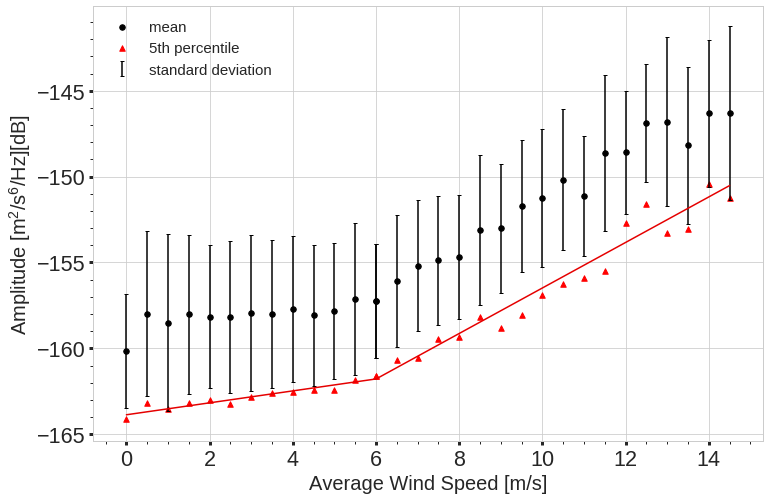

In [276]:
def func_exp(x, a, k, b):
    return a * np.exp(k*x) + b

p0 = (1.,1.e-5,1.)


t=32

xcol = weights.columns[t]

g = weights['HWSavg[m/s]'] <= 6
h = weights['HWSavg[m/s]'] >= 6

x1= np.array(weights[g]['HWSavg[m/s]'].values)

y1= np.array(weights[g][xcol])

x2= np.array(weights[h]['HWSavg[m/s]'].values)

y2= np.array(weights[h][xcol])

x1_mean= np.array(weights_mean[g]['HWSavg[m/s]'].values)

y1_mean= np.array(weights_mean[g][xcol])

x2_mean= np.array(weights_mean[h]['HWSavg[m/s]'].values)

y2_mean= np.array(weights_mean[h][xcol])

x1_median= np.array(weights_median[g]['HWSavg[m/s]'].values)

y1_median= np.array(weights_median[g][xcol])

x2_median= np.array(weights_median[h]['HWSavg[m/s]'].values)

y2_median= np.array(weights_median[h][xcol])

std_1 = np.array(weights_std[g][xcol])
std_2 = np.array(weights_std[h][xcol])
#popt,pcov = curve_fit(func_lin, x1, y1,sigma=exp_stdv_1, absolute_sigma=False)

#popt2,pcov2 = curve_fit(func_lin, x2, y2,sigma=exp_stdv_2, absolute_sigma=False)

print(xcol)

popt2, pcov2 = curve_fit(func_lin, x1, y1, sigma=std_1)

popt3, pcov3 = curve_fit(func_lin, x2, y2, sigma=std_2)

popt4, pcov4 = curve_fit(func_lin, x1_mean, y1_mean, sigma=std_1, absolute_sigma=False)

popt5, pcov5 = curve_fit(func_lin, x2_mean, y2_mean,sigma=std_2, absolute_sigma=False)

popt6, pcov6 = curve_fit(func_lin, x1_median, y1_median, sigma=std_1, absolute_sigma=False)

popt7, pcov7 = curve_fit(func_lin, x2_median, y2_median,sigma=std_2, absolute_sigma=False)

r1 = func_lin(6, popt2[0], popt2[1])

r2 = func_lin(6, popt3[0], popt3[1])

if r1 <= r2:

    for i in range(0,1001,1):

        i = i/100

        r1 = func_lin(6, popt2[0], popt2[1])

        r2 = func_lin(6, popt3[0], popt3[1]-i)

        p1 = r1 - r2

        if np.abs(p1) <= 0.01:

            plt.errorbar(x1_mean, y1_mean, yerr=std_1, fmt='none',ecolor='k',label='standard deviation', capsize=2)

            plt.errorbar(x2_mean, y2_mean, yerr=std_2,fmt='none',ecolor='k', capsize=2)

            #plt.errorbar(x2, y2, yerr=exp_stdv, fmt='dk',label='10th percentile')
            
            plt.scatter(x1_mean, y1_mean ,color='k',label='mean',s=30)

            plt.scatter(x2_mean, y2_mean,color='k',s=30)
            
            plt.scatter(x1, y1,  marker='^', color='r',s=30, label='5th percentile')

            plt.scatter(x2, y2, marker='^', color='r',s=30)

            plt.plot(x1, func_lin(x1, popt2[0], popt2[1]),  color='xkcd:red')

            plt.plot(x2, func_lin(x2, popt3[0], popt3[1]-i),  color='xkcd:red')

            plt.xlabel('Average Wind Speed [m/s]')

            plt.ylabel('Amplitude [$\mathdefault{m^2/s^6/Hz}$][dB]')

            plt.grid()

            plt.legend(loc='upper left')
            
            plt.savefig('5th_percentile_regression_behaviour_std_smoothed_0.29s_05.03.2020.jpeg')

            plt.show()
            
            

            break
            
if r2 <= r1:

    for i in range(0,1001,1):

        i = i/100

        r1 = func_lin(6, popt2[0], popt2[1])

        r2 = func_lin(6, popt3[0], popt3[1]+i)

        p1 = r1 - r2

        if np.abs(p1) <= 0.01:

            plt.errorbar(x1_mean, y1_mean, yerr=std_1, fmt='none',ecolor='k',label='standard deviation', capsize=2)

            plt.errorbar(x2_mean, y2_mean, yerr=std_2,fmt='none',ecolor='k', capsize=2)
            
            plt.scatter(x1_mean, y1_mean ,color='k',label='mean',s=30)

            plt.scatter(x2_mean, y2_mean,color='k',s=30)

            #plt.errorbar(x2, y2, yerr=exp_stdv, fmt='dk',label='10th percentile')
            
            plt.scatter(x1, y1,  marker='^', color='r',s=30, label='5th percentile')

            plt.scatter(x2, y2, marker='^', color='r',s=30)

            plt.plot(x1, func_lin(x1, popt2[0], popt2[1]),  color='xkcd:red')

            plt.plot(x2, func_lin(x2, popt3[0], popt3[1]+i),  color='xkcd:red')

            plt.xlabel('Average Wind Speed [m/s]')

            plt.ylabel('Amplitude [$\mathdefault{m^2/s^6/Hz}$][dB]')

            plt.grid()

            plt.legend(loc='upper left')
            
            plt.savefig('5th_percentile_regression_behaviour_std_smoothed_0.29s.jpeg')

            plt.show()
            
            

            break




__Best Way__

In [342]:
weights.columns

Index(['HWSavg[m/s]', '0.019999999999999997', '0.02181015465330515',
       '0.02378414230005442', '0.025936791093020196', '0.02828427124746191',
       '0.030844216508158825', '0.03363585661014859', '0.03668016172818686',
       '0.04000000000000001', '0.043620309306610316', '0.047568284600108854',
       '0.05187358218604041', '0.056568542494923824', '0.061688433016317656',
       '0.0672717132202972', '0.07336032345637372', '0.08000000000000003',
       '0.08724061861322065', '0.09513656920021774', '0.10374716437208083',
       '0.11313708498984766', '0.12337686603263534', '0.1345434264405944',
       '0.14672064691274747', '0.1600000000000001', '0.17448123722644132',
       '0.19027313840043547', '0.20749432874416165', '0.22627416997969532',
       '0.24675373206527068', '0.2690868528811888', '0.29344129382549494',
       '0.3200000000000002', '0.34896247445288264', '0.38054627680087094',
       '0.4149886574883233', '0.45254833995939064', '0.49350746413054136',
       '0.538173705

In [343]:
def func_exp(x, a, k, b):
    return a * np.exp(k*x) + b

exp_parameters = pd.DataFrame()

lin_parameters = pd.DataFrame()

for t in range(1,len(weights.T)):

    p0 = (1.,1.e-5,1.)

    xcol = weights.columns[t]

    g = weights['HWSavg[m/s]'] <= 6
    h = weights['HWSavg[m/s]'] >= 6

    x1= np.array(weights[g]['HWSavg[m/s]'].values)

    y1= np.array(weights[g][xcol])

    x2= np.array(weights[h]['HWSavg[m/s]'].values)

    y2= np.array(weights[h][xcol])

    x1_mean= np.array(weights_mean[g]['HWSavg[m/s]'].values)

    y1_mean= np.array(weights_mean[g][xcol])

    x2_mean= np.array(weights_mean[h]['HWSavg[m/s]'].values)

    y2_mean= np.array(weights_mean[h][xcol])

    std_1 = np.array(weights_std[g][xcol])
    std_2 = np.array(weights_std[h][xcol])
    #popt,pcov = curve_fit(func_lin, x1, y1,sigma=exp_stdv_1, absolute_sigma=False)

    #popt2,pcov2 = curve_fit(func_lin, x2, y2,sigma=exp_stdv_2, absolute_sigma=False)

    print(xcol)

    popt2, pcov2 = curve_fit(func_exp, x1, y1, p0, sigma=std_1, maxfev=4000)

    popt3, pcov3 = curve_fit(func_lin, x2, y2, sigma=std_2)

    r1 = func_exp(6, popt2[0], popt2[1], popt2[2])

    r2 = func_lin(6, popt3[0], popt3[1])

    if r1 <= r2:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_exp(6, popt2[0], popt2[1], popt2[2])

            r2 = func_lin(6, popt3[0], popt3[1]-i)

            p1 = r1 - r2

            if np.abs(p1) <= 0.01:

                #plt.errorbar(x1_median, y1_median, yerr=std_1, fmt='.k',ecolor='k',label='standard deviation', capsize=2)

                #plt.errorbar(x2_median, y2_median, yerr=exp_stdv_2,fmt='.k',ecolor='k', capsize=2)

                #plt.errorbar(x2, y2, yerr=exp_stdv, fmt='dk',label='10th percentile')
                a_exp = popt2[0]

                b_exp = popt2[1] 

                c_exp = popt2[2] 

                exp_parameters = exp_parameters.append({'Period':xcol,'a_exp':a_exp,'b_exp':b_exp,'c_exp':c_exp},ignore_index=True)

                a_lin = popt3[0]

                b_lin = popt3[1] - i

                lin_parameters = lin_parameters.append({'Period':xcol,'a_lin':a_lin,'b_lin':b_lin},ignore_index=True)

                break

    if r2 <= r1:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_exp(6, popt2[0], popt2[1], popt2[2])

            r2 = func_lin(6, popt3[0], popt3[1]+i)

            p1 = r1 - r2

            if np.abs(p1) <= 0.01:

                a_exp = popt2[0]

                b_exp = popt2[1] 

                c_exp = popt2[2] 

                exp_parameters = exp_parameters.append({'Period':xcol,'a_exp':a_exp,'b_exp':b_exp,'c_exp':c_exp},ignore_index=True)

                a_lin = popt3[0]

                b_lin = popt3[1] + i

                lin_parameters = lin_parameters.append({'Period':xcol,'a_lin':a_lin,'b_lin':b_lin},ignore_index=True)

                break




0.019999999999999997
0.02181015465330515
0.02378414230005442
0.025936791093020196
0.02828427124746191
0.030844216508158825
0.03363585661014859
0.03668016172818686
0.04000000000000001
0.043620309306610316
0.047568284600108854
0.05187358218604041
0.056568542494923824
0.061688433016317656
0.0672717132202972
0.07336032345637372
0.08000000000000003
0.08724061861322065
0.09513656920021774
0.10374716437208083
0.11313708498984766
0.12337686603263534
0.1345434264405944
0.14672064691274747
0.1600000000000001
0.17448123722644132
0.19027313840043547
0.20749432874416165
0.22627416997969532
0.24675373206527068
0.2690868528811888
0.29344129382549494
0.3200000000000002
0.34896247445288264
0.38054627680087094
0.4149886574883233
0.45254833995939064
0.49350746413054136
0.5381737057623776
0.5868825876509899
0.6400000000000003
0.6979249489057653
0.7610925536017419
0.8299773149766466
0.9050966799187813
0.9870149282610827
1.076347411524755
1.1737651753019798
1.2800000000000007
1.3958498978115306
1.5221851072

In [285]:
lin1_parameters = pd.DataFrame()

lin2_parameters = pd.DataFrame()

for t in range(1,len(weights.T)):

    xcol = weights.columns[t]

    g = weights['HWSavg[m/s]'] <= 6
    h = weights['HWSavg[m/s]'] >= 6

    x1= np.array(weights[g]['HWSavg[m/s]'].values)

    y1= np.array(weights[g][xcol])

    x2= np.array(weights[h]['HWSavg[m/s]'].values)

    y2= np.array(weights[h][xcol])

    x1_mean= np.array(weights_mean[g]['HWSavg[m/s]'].values)

    y1_mean= np.array(weights_mean[g][xcol])

    x2_mean= np.array(weights_mean[h]['HWSavg[m/s]'].values)

    y2_mean= np.array(weights_mean[h][xcol])

    std_1 = np.array(weights_std[g][xcol])
    std_2 = np.array(weights_std[h][xcol])
    #popt,pcov = curve_fit(func_lin, x1, y1,sigma=exp_stdv_1, absolute_sigma=False)

    #popt2,pcov2 = curve_fit(func_lin, x2, y2,sigma=exp_stdv_2, absolute_sigma=False)
    
    print(xcol)

    

    popt2, pcov2 = curve_fit(func_lin, x1, y1, sigma=std_1)

    popt3, pcov3 = curve_fit(func_lin, x2, y2, sigma=std_2)

    r1 = func_lin(6, popt2[0], popt2[1])

    r2 = func_lin(6, popt3[0], popt3[1])

    if r1 <= r2:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_lin(6, popt2[0], popt2[1])

            r2 = func_lin(6, popt3[0], popt3[1]-i)

            p1 = r1 - r2

            if np.abs(p1) <= 0.01:
                

                a_lin1 = popt2[0]

                b_lin1 = popt2[1]
                

                lin1_parameters = lin1_parameters.append({'Period':xcol,'a_lin1':a_lin1,'b_lin1':b_lin1},ignore_index=True)

                a_lin2 = popt3[0]

                b_lin2 = popt3[1] - i

                lin2_parameters = lin2_parameters.append({'Period':xcol,'a_lin2':a_lin2,'b_lin2':b_lin2},ignore_index=True)

                break

    if r2 <= r1:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_lin(6, popt2[0], popt2[1])

            r2 = func_lin(6, popt3[0], popt3[1]+i)

            p1 = r1 - r2
            
            

            if np.abs(p1) <= 0.01:
                
                a_lin1 = popt2[0]

                b_lin1 = popt2[1]

                lin1_parameters = lin1_parameters.append({'Period':xcol,'a_lin1':a_lin1,'b_lin1':b_lin1},ignore_index=True)

                a_lin2 = popt3[0]

                b_lin2 = popt3[1]+i

                lin2_parameters = lin2_parameters.append({'Period':xcol,'a_lin2':a_lin2,'b_lin2':b_lin2},ignore_index=True)

                break




0.019999999999999997
0.02181015465330515
0.02378414230005442
0.025936791093020196
0.02828427124746191
0.030844216508158825
0.03363585661014859
0.03668016172818686
0.04000000000000001
0.043620309306610316
0.047568284600108854
0.05187358218604041
0.056568542494923824
0.061688433016317656
0.0672717132202972
0.07336032345637372
0.08000000000000003
0.08724061861322065
0.09513656920021774
0.10374716437208083
0.11313708498984766
0.12337686603263534
0.1345434264405944
0.14672064691274747
0.1600000000000001
0.17448123722644132
0.19027313840043547
0.20749432874416165
0.22627416997969532
0.24675373206527068
0.2690868528811888
0.29344129382549494
0.3200000000000002
0.34896247445288264
0.38054627680087094
0.4149886574883233
0.45254833995939064
0.49350746413054136
0.5381737057623776
0.5868825876509899
0.6400000000000003
0.6979249489057653
0.7610925536017419
0.8299773149766466
0.9050966799187813
0.9870149282610827
1.076347411524755
1.1737651753019798
1.2800000000000007
1.3958498978115306
1.5221851072

In [95]:
lin1_parameters = pd.DataFrame()

lin2_parameters = pd.DataFrame()

for t in range(2,len(df_merge.T)):
    xcol = df_merge.columns[t]

    x1_mean = np.array(df_mean_1['HWSavg[m/s]'].values)

    y1_mean= np.array(df_mean_1[xcol])

    x1_median = np.array(df_median_1['HWSavg[m/s]'].values)

    y1_median = np.array(df_median_1[xcol])

    x1= np.array(df_merge['HWSavg[m/s]'].values)

    y1= np.array(df_merge[xcol])

    exp_stdv_1 = np.array(df_merge_std_1[xcol])

    x2_mean = np.array(df_mean_2['HWSavg[m/s]'].values)

    y2_mean= np.array(df_mean_2[xcol])

    x2_median = np.array(df_median_2['HWSavg[m/s]'].values)

    y2_median = np.array(df_median_2[xcol])

    x2= np.array(df_merge2['HWSavg[m/s]'].values)

    y2= np.array(df_merge2[xcol])

    exp_stdv_2 = np.array(df_merge_std_2[xcol])

    #popt,pcov = curve_fit(func_lin, x1, y1,sigma=exp_stdv_1, absolute_sigma=False)

    #popt2,pcov2 = curve_fit(func_lin, x2, y2,sigma=exp_stdv_2, absolute_sigma=False)

    print(xcol)

    popt2, pcov2 = curve_fit(func_lin, x1, y1, sigma=exp_stdv_1, absolute_sigma=False)

    popt3, pcov3 = curve_fit(func_lin, x2, y2,sigma=exp_stdv_2, absolute_sigma=False)

    r1 = func_lin(6, popt2[0], popt2[1])

    r2 = func_lin(6, popt3[0], popt3[1])

    if r1 <= r2:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_lin(6, popt2[0], popt2[1]+i)

            r2 = func_lin(6, popt3[0], popt3[1])

            p1 = r1 - r2

            if np.abs(p1) <= 0.01:

                a_lin1 = popt2[0]

                b_lin1 = popt2[1] + i

                lin1_parameters = lin1_parameters.append({'Period':xcol,'a_lin1':a_lin1,'b_lin1':b_lin1},ignore_index=True)

                a_lin2 = popt3[0]

                b_lin2 = popt3[1]

                lin2_parameters = lin2_parameters.append({'Period':xcol,'a_lin2':a_lin2,'b_lin2':b_lin2},ignore_index=True)



                break

    if r2 <= r1:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_lin(6, popt2[0], popt2[1])

            r2 = func_lin(6, popt3[0], popt3[1]+i)

            p1 = r1 - r2

            if np.abs(p1) <= 0.01:

                a_lin1 = popt2[0]

                b_lin1 = popt2[1]

                lin1_parameters = lin1_parameters.append({'Period':xcol,'a_lin1':a_lin1,'b_lin1':b_lin1},ignore_index=True)

                a_lin2 = popt3[0]

                b_lin2 = popt3[1]+i

                lin2_parameters = lin2_parameters.append({'Period':xcol,'a_lin2':a_lin2,'b_lin2':b_lin2},ignore_index=True)


                break


0.019999999999999997
0.02181015465330515
0.02378414230005442
0.025936791093020196
0.02828427124746191
0.030844216508158825
0.03363585661014859
0.03668016172818686
0.04000000000000001
0.043620309306610316
0.047568284600108854
0.05187358218604041
0.056568542494923824
0.061688433016317656
0.0672717132202972
0.07336032345637372
0.08000000000000003
0.08724061861322065
0.09513656920021774
0.10374716437208083
0.11313708498984766
0.12337686603263534
0.1345434264405944
0.14672064691274747
0.1600000000000001
0.17448123722644132
0.19027313840043547
0.20749432874416165
0.22627416997969532
0.24675373206527068
0.2690868528811888
0.29344129382549494
0.3200000000000002
0.34896247445288264
0.38054627680087094
0.4149886574883233
0.45254833995939064
0.49350746413054136
0.5381737057623776
0.5868825876509899
0.6400000000000003
0.6979249489057653
0.7610925536017419
0.8299773149766466
0.9050966799187813
0.9870149282610827
1.076347411524755
1.1737651753019798
1.2800000000000007
1.3958498978115306
1.5221851072

In [30]:
lin1_parameters = pd.DataFrame()

lin2_parameters = pd.DataFrame()

for t in range(2,907):
    
    print(t)

    xcol = df_merge.columns[t]

    x1= np.array(df_merge['HWSavg[m/s]'].values)

    y1= np.array(df_merge[xcol])

    exp_stdv_1 = np.array(df_merge_std_1[xcol])

    x2= np.array(df_merge2['HWSavg[m/s]'].values)

    y2= np.array(df_merge2[xcol])

    exp_stdv_2 = np.array(df_merge_std_2[xcol])

    #popt,pcov = curve_fit(func_lin, x1, y1,sigma=exp_stdv_1, absolute_sigma=False)

    #popt2,pcov2 = curve_fit(func_lin, x2, y2,sigma=exp_stdv_2, absolute_sigma=False)

    popt2, pcov2 = curve_fit(func_lin, x1, y1, sigma=exp_stdv_1, absolute_sigma=False)

    popt3, pcov3 = curve_fit(func_lin, x2, y2,sigma=exp_stdv_2, absolute_sigma=False)

    r1 = func_lin(6, popt2[0], popt2[1])

    r2 = func_lin(6, popt3[0], popt3[1])

    if r1 <= r2:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_lin(6, popt2[0], popt2[1]+i)

            r2 = func_lin(6, popt3[0], popt3[1])

            p1 = r1 - r2

            if np.abs(p1) <= 0.01:
                
                a_lin1 = popt2[0]

                b_lin1 = popt2[1] + i

                lin1_parameters = lin1_parameters.append({'Period':xcol,'a_lin1':a_lin1,'b_lin1':b_lin1},ignore_index=True)

                a_lin2 = popt3[0]

                b_lin2 = popt3[1]

                lin2_parameters = lin2_parameters.append({'Period':xcol,'a_lin2':a_lin2,'b_lin2':b_lin2},ignore_index=True)

                break

    if r2 <= r1:

        for i in range(0,1001,1):

            i = i/100

            r1 = func_lin(6, popt2[0], popt2[1])

            r2 = func_lin(6, popt3[0], popt3[1]+i)

            p1 = r1 - r2

            if np.abs(p1) <= 0.01:  
                
                a_lin1 = popt2[0]

                b_lin1 = popt2[1]

                lin1_parameters = lin1_parameters.append({'Period':xcol,'a_lin1':a_lin1,'b_lin1':b_lin1},ignore_index=True)

                a_lin2 = popt3[0]

                b_lin2 = popt3[1]+i

                lin2_parameters = lin2_parameters.append({'Period':xcol,'a_lin2':a_lin2,'b_lin2':b_lin2},ignore_index=True)

                break



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

__Save model__

In [286]:
lin1_parameters = lin1_parameters.set_index(['Period'])

lin2_parameters = lin2_parameters.set_index(['Period'])

lin1_lin2_parameters = lin1_parameters.merge(lin2_parameters, on=['Period'])

In [344]:
exp_parameters = exp_parameters.set_index(['Period'])

lin_parameters = lin_parameters.set_index(['Period'])

lin1_lin2_parameters = exp_parameters.merge(lin_parameters, on=['Period'])

In [97]:
lin1_lin2_parameters.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/5th_percentile_ELIS_HHZ_lin1_lin2_smoothed_parameters_10seg_weighted_STD_10_04.03.2020.csv')

In [287]:
lin1_lin2_parameters.to_csv('CSV/NoiseAndWindSpeed/ELIS/2017/5th_percentile_ELIS_HHZ_lin1_lin2_smoothed_then_mean_parameters_10seg_weighted_STD_10_05.03.2020.csv')

In [288]:
lin1_lin2_parameters = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/5th_percentile_ELIS_HHZ_lin1_lin2_smoothed_then_mean_parameters_10seg_weighted_STD_10_05.03.2020.csv')

In [289]:
lin1_lin2_parameters =lin1_lin2_parameters.set_index('Period')

In [290]:
lin1_lin2_parameters

,a_lin1,b_lin1,a_lin2,b_lin2
Period,,,,
0.020000,0.153811,-147.453134,0.818193,-151.431160
0.021810,0.213048,-147.120439,0.854752,-150.969699
0.023784,0.232755,-147.040565,0.934713,-151.250266
0.025937,0.262840,-147.146491,1.005302,-151.598771
0.028284,0.279710,-147.302386,1.056603,-151.959468
0.030844,0.338365,-145.788262,1.251720,-151.262633
0.033636,0.370356,-146.397118,1.299941,-151.969632
0.036680,0.411642,-147.585062,1.364142,-153.290752
0.040000,0.466724,-148.692072,1.392076,-154.240558


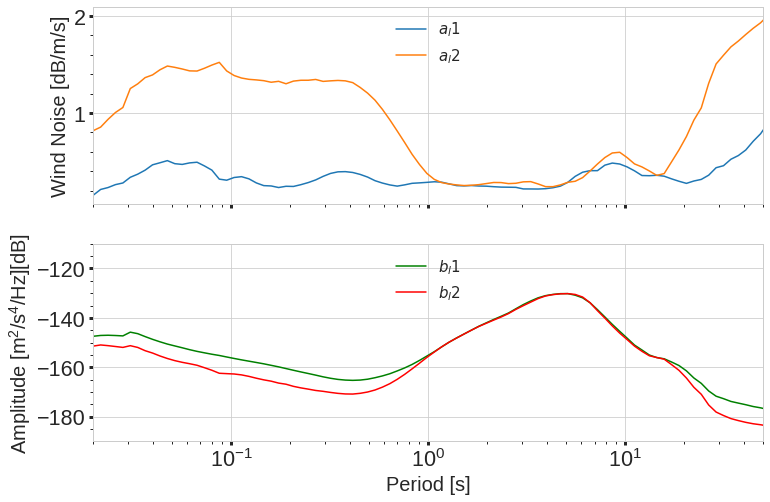

In [291]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(lin1_lin2_parameters['a_lin1'], label='a linear 1')
ax1.plot(lin1_lin2_parameters['a_lin2'], label='a linear 2')


#ax1.text(0.025, 0.3,r'x = Wind Speed [m/s]', color='black')
#ax1.text(0.025, 0.6,r'y = Noise Amplitude [dB]', color='black')
#ax1.text(0.025, 0.9, r'$[i: 6  \Rightarrow \infty]: y_i=((a_l*x_i) + b_l)$', color='black')
#ax1.text(0.025, 1.2, r'$[i: 0  \Rightarrow 5]: y_i = ((a_e*e(x_i)) +b_e)$', color='black')

ax1.semilogx()
ax1.legend(["$a_l1$",'$a_l2$'], loc="upper center")


ax2.set_ylim([-190,-110])
ax2.set_xlim([0.02,50])
ax2.set_xlabel('Period [s]')
ax2.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')
ax1.set_ylabel('Wind Noise [dB/m/s]')
ax2.plot(lin1_lin2_parameters['b_lin1'],c='green', label='b linear 1')
ax2.plot(lin1_lin2_parameters['b_lin2'], c='red', label='b linear 2')

ax2.legend(['$b_l1$','$b_l2$'], loc="upper center")


ax2.semilogx()
ax1.grid()
ax2.grid()
#ax1.set_title('2017 ELIS HHZ 5th percentile wind noise model')

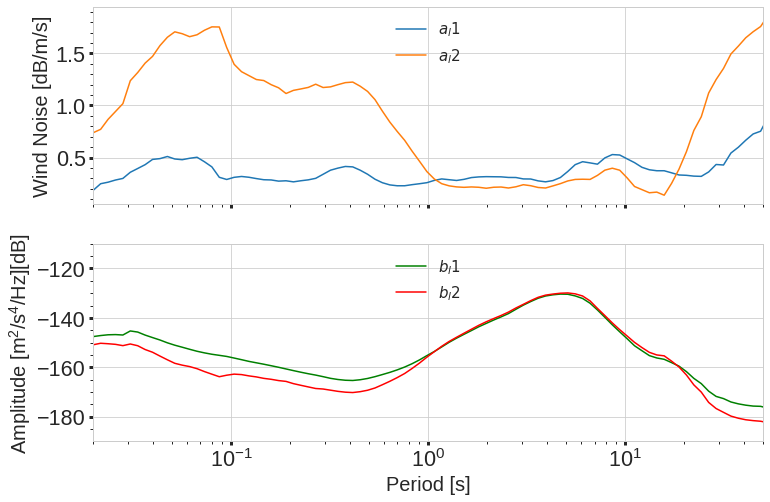

In [106]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(lin1_lin2_parameters['a_lin1'], label='a linear 1')
ax1.plot(lin1_lin2_parameters['a_lin2'], label='a linear 2')


#ax1.text(0.025, 0.3,r'x = Wind Speed [m/s]', color='black')
#ax1.text(0.025, 0.6,r'y = Noise Amplitude [dB]', color='black')
#ax1.text(0.025, 0.9, r'$[i: 6  \Rightarrow \infty]: y_i=((a_l*x_i) + b_l)$', color='black')
#ax1.text(0.025, 1.2, r'$[i: 0  \Rightarrow 5]: y_i = ((a_e*e(x_i)) +b_e)$', color='black')

ax1.semilogx()
ax1.legend(["$a_l1$",'$a_l2$'], loc="upper center")


ax2.set_ylim([-190,-110])
ax2.set_xlim([0.02,50])
ax2.set_xlabel('Period [s]')
ax2.set_ylabel('Amplitude [dB (m/$s^2$) $^2$/Hz]')
ax1.set_ylabel('Wind Noise [dB/m/s]')
ax2.plot(lin1_lin2_parameters['b_lin1'],c='green', label='b linear 1')
ax2.plot(lin1_lin2_parameters['b_lin2'], c='red', label='b linear 2')

ax2.legend(['$b_l1$','$b_l2$'], loc="upper center")


ax2.semilogx()
ax1.grid()
ax2.grid()
#ax1.set_title('2017 ELIS HHZ 5th percentile wind noise model')
plt.savefig('2017_ELIS_HHZ_5th_percentile_smoothed_wind_noise_model_without_title.jpeg')

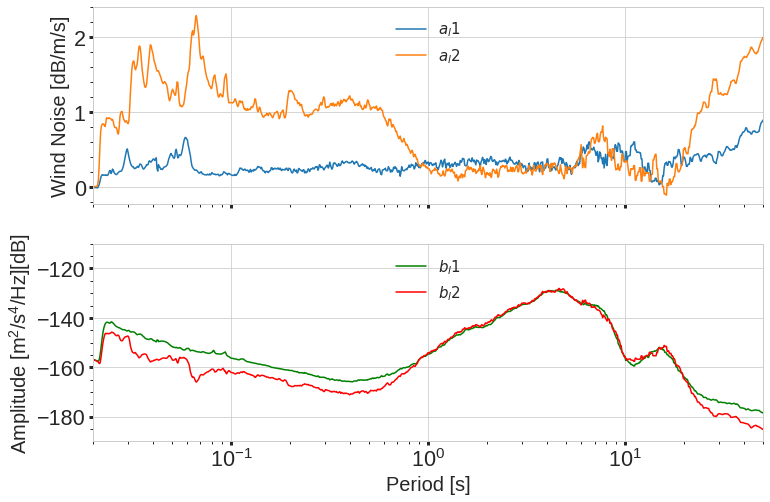

In [105]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(lin1_lin2_parameters['a_lin1'], label='a linear 1')
ax1.plot(lin1_lin2_parameters['a_lin2'], label='a linear 2')


#ax1.text(0.025, 0.3,r'x = Wind Speed [m/s]', color='black')
#ax1.text(0.025, 0.6,r'y = Noise Amplitude [dB]', color='black')
#ax1.text(0.025, 0.9, r'$[i: 6  \Rightarrow \infty]: y_i=((a_l*x_i) + b_l)$', color='black')
#ax1.text(0.025, 1.2, r'$[i: 0  \Rightarrow 5]: y_i = ((a_e*e(x_i)) +b_e)$', color='black')

ax1.semilogx()
ax1.legend(["$a_l1$",'$a_l2$'], loc="upper center")


ax2.set_ylim([-190,-110])
ax2.set_xlim([0.02,50])
ax2.set_xlabel('Period [s]')
ax2.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')
ax1.set_ylabel('Wind Noise [dB/m/s]')
ax2.plot(lin1_lin2_parameters['b_lin1'],c='green', label='b linear 1')
ax2.plot(lin1_lin2_parameters['b_lin2'], c='red', label='b linear 2')

ax2.legend(['$b_l1$','$b_l2$'], loc="upper center")


ax2.semilogx()
#ax1.set_title('2017 ELIS HHZ 5th percentile wind noise model')
plt.savefig('2017_ELIS_HHZ_5th_percentile_wind_noise_model_without_title.jpeg')